Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


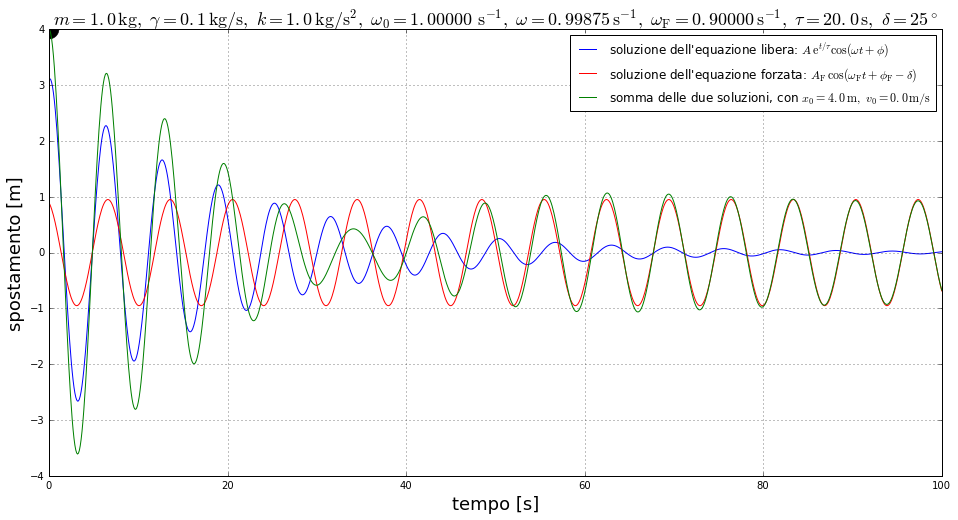

In [35]:
# Sistema massa-molla forzato e smorzato, risonanza
# Esercizi:
# - osservare cosa accade con diverse condizioni iniziali e con diversa ampiezza, pulsazione e fase della forzante
# - verificare la correttezza delle formule, in particolare l'espressione di A, phi in funzione delle condizioni iniziali

%pylab inline

# parametri del sistema:

k          = 1.                                                        # kg/s**2   costante elastica
gamma      = 0.1                                                       # kg/s      coefficiente di smorzamento
m          = 1.                                                        # kg        massa

# parametri della forzante:

F0         = 0.2                                                       # N         ampiezza del termine forzante
omegaf     = 0.9                                                       # 1/s       pulsazione della forzante
phif       = 45./180.*pi                                               # rad       fase della forzante (45 gradi convertiti in radianti)

# tempi caratteristici:

tau        = 2.*m/gamma                                                # 1/s       tempo caratteristico di smorzamento
omega0     = sqrt(k/m)                                                 # 1/s       pulsazione del sistema non smorzato
omega      = sqrt(omega0**2-1./tau**2)                                 # 1/s       pulsazione del sistema smorzato

# dati iniziali:

x0         = 4.0                                                       # m         posizione iniziale
v0         = 0.0                                                       # m/s       velocità iniziale

tmax       = 100.                                                      # s         intervallo di tempo di osservazione
npts       = 1000                                                      #           numero di istanti temporali considerati

# legge del moto:

dphi       = arctan2(2*omegaf/tau,omega0**2-omegaf**2)                 # rad       sfasamento dell'integrale particolare
phif1      = phif-dphi                                                 # rad       fase dell'integrale particolare
Af         = F0/m/sqrt((omega0**2-omegaf**2)**2+4*(omegaf/tau)**2)     # m         ampiezza delle oscillazioni dell'integrale particolare

Asinphi    = -(v0+x0/tau+omegaf*Af*sin(phif1)-Af/tau*cos(phif1))/omega # m         relazione che deriva dalle condizioni iniziali         
Acosphi    =   x0-Af*cos(phif1)                                        # m         relazione che deriva dalle condizioni iniziali

phi        = arctan2(Asinphi,Acosphi)                                  # rad       fase della soluzione dell'omogenea associata
A          = sqrt(Asinphi**2+Acosphi**2)                               # m         ampiezza della soluzione dell'omogenea associata

t          = linspace(0,tmax,npts)                                     # s         istanti di tempo successivi                 
xom        = A*exp(-t/tau)*cos(omega*t+phi)                            # m         soluzione dell'omogenea associata
xpart      = Af*cos(omegaf*t+phif1)                                    # m         integrale particolare

# grafico:

fig=figure(figsize=(16,8)).add_subplot(1,1,1)
lw=4; fs=18
plot(0,4,'ko',markersize=20)
plot(t,xom,label=r"soluzione dell'equazione libera: $A\,\mathrm{e}^{t/{\tau}}\cos(\omega t+\phi)$",linewidth=1,color='b')
plot(t,xpart,label=r"soluzione dell'equazione forzata: $A_\mathrm{F}\,\cos(\omega_\mathrm{F}t+\phi_\mathrm{F}-\delta)$",linewidth=1,color='r')
plot(t,xom+xpart,label=r"somma delle due soluzioni, con $x_0=%3.1f\,\mathrm{m},\ v_0 = %3.1f\,\mathrm{m/s}$"%(x0,v0),linewidth=1,color='g')
title(r'$m = %3.1f\,\mathrm{kg},\ \gamma = %3.1f\,\mathrm{kg/s},\ k = %3.1f\,\mathrm{kg/s^2},\ \omega_0=%.5f\,\,\mathrm{s}^{-1},\ \omega = %.5f\,\mathrm{s}^{-1},\ \omega_\mathrm{F} = %.5f\,\mathrm{s}^{-1},\ \tau = %3.1f\,\mathrm{s},\ \delta = %3.0f^\circ$'
      %(m,gamma,k,omega0,omega,omegaf,tau,dphi/pi*180.),fontsize=fs)
xlabel('tempo [s]',fontsize=fs) 
ylabel('spostamento [m]',fontsize=fs)
legend(); grid()

/home/andrea/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in sqrt


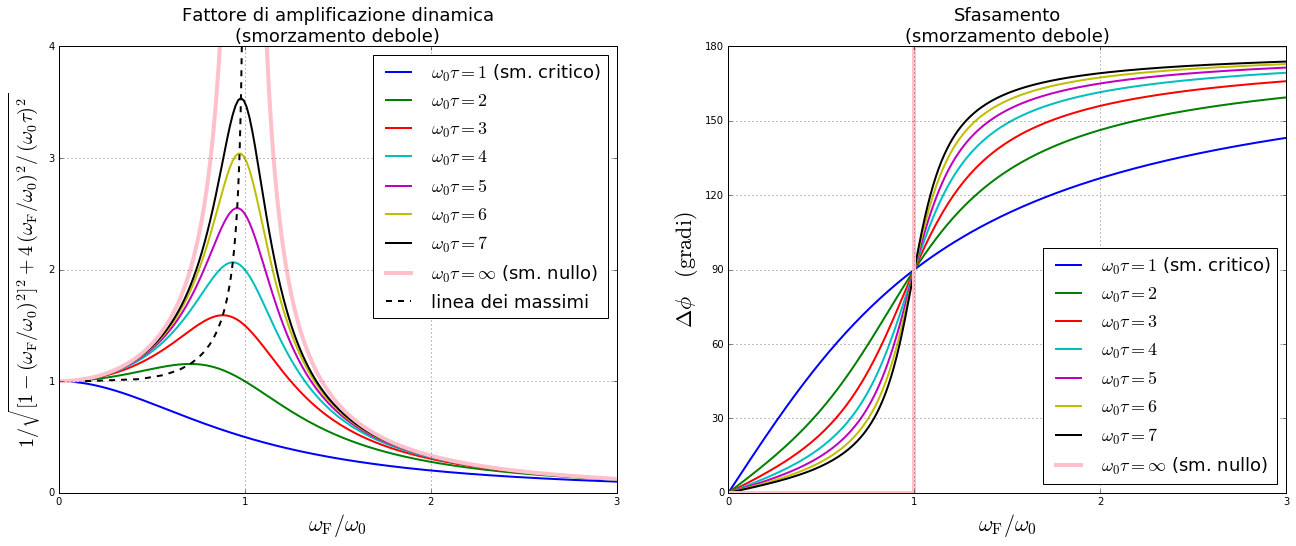

In [6]:
# Fattore di amplificazione dinamica e sfasamento
# La linea tratteggiata è la linea dei massimi
# - verificare la correttezza delle formule

def amplification(x,y):
    return 1./sqrt((1.-x**2)**2+4.*(x/y)**2)

def phase(x,y):
    return arctan2(2.*x/y,1-x**2)*180./pi  

def crit(y):
    if (y==1):
        return ' (sm. critico)'
    else:
        return ''

fig=figure(figsize=(22,8))

ax=fig.add_subplot(121)
x=linspace(0,3,200)
for y in arange(1.,8.,1.):
    plot(x,amplification(x,y),label=r'$\omega_0\tau=%.0f$'%y+crit(y),linewidth=2)
plot(x,1./abs(1.-x**2),'pink',linewidth=4,label=r'$\omega_0\tau=\infty$ (sm. nullo)')
y=linspace(1,8)
x1=sqrt(1-2./y**2)
plot(x1,amplification(x1,y),'k--',linewidth=2,label='linea dei massimi')
xlabel(r'$\omega_\mathrm{F}/\omega_0$',fontsize=22)
ylabel(r'$1/\sqrt{[1-(\omega_\mathrm{F}/\omega_0)^2]^2+4\,(\omega_\mathrm{F}/\omega_0)^2/\,(\omega_0\tau)^2}$',fontsize=20)
ax.set_xticks(arange(0,3.1))
ax.set_yticks(arange(0,4.1))
title('Fattore di amplificazione dinamica\n(smorzamento debole)',fontsize=18)
ylim(0,4)
legend(fontsize=18)
grid()

ax=fig.add_subplot(122)
for y in arange(1.,8.,1.):
    plot(x,phase(x,y),label=r'$\omega_0\tau=%.0f$'%y+crit(y),linewidth=2)
plot([0,1,1,3],[0,0,180,180],'pink',linewidth=4,label=r'$\omega_0\tau=\infty$ (sm. nullo)')
xlabel(r'$\omega_\mathrm{F}/\omega_0$',fontsize=22)
ylabel(r'$\Delta\phi\quad(\mathrm{gradi})$',fontsize=22)
ax.set_xticks(arange(0,3.1))
ax.set_yticks(arange(0,180.1,30))
title('Sfasamento\n(smorzamento debole)',fontsize=18)
legend(fontsize=18,loc=4)
grid()